In [1]:
import warnings
warnings.filterwarnings('ignore')

# Load Required Libraries

In [2]:
#Load Libraries for Data Processing & Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Load Libraries for Modelling
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import  variance_inflation_factor
from sklearn import metrics


In [5]:
#path = r"D:\18-DS\Datasets-Kaggle\\"
path =""

# Analyse Data of Given Train & Test File

In [6]:
df_train = pd.read_csv(path + "DigitRecognizer-train.csv")
df_test = pd.read_csv(path +"DigitRecognizer-test.csv")

In [7]:
df_train.shape

(42000, 785)

In [8]:
df_test.shape

(28000, 784)

In [9]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [11]:
#df_train.isnull().sum()

In [13]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#158 Records with atleast 1 null values
df_train [ df_train.isna().sum(axis=1) >1 ].head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783


# Approach 1 of Modelling. Create Categorical Variable for Age & Fare

## Prepare Data for Modelling

In [15]:
y = df_train.pop("label")
X = df_train

# Train Test Split

In [16]:
X_test1, X_train1, y_test1, y_train1= train_test_split(X, y, test_size=.30, train_size=70, random_state=40)

In [17]:
cols=X_train1.columns

In [18]:
def vif():
    X = X_train1[cols]
    vif = pd.DataFrame()
    vif['Feature']= X.columns
    vif['vif'] = [variance_inflation_factor(X.values,i) for i in range( X.shape[1]) ]
    vif['vif'] = round(vif['vif'],2)
    vif= vif.sort_values("vif",ascending=False)
    print (vif)

In [19]:
def print_train_score():
    print ("R2 Score               :", round( metrics.r2_score       (y_true= y_train1,y_pred= y_train_result['Pred_Final']) ,3))
    print ("Recall/Senstivity Score:", round( metrics.recall_score   (y_true= y_train1,y_pred= y_train_result['Pred_Final']) ,3))
    print ("Precision Score        :", round( metrics.precision_score(y_true= y_train1,y_pred= y_train_result['Pred_Final']) ,3))
    print ("Accuracy Score         :", round( metrics.accuracy_score (y_true= y_train1,y_pred= y_train_result['Pred_Final']) ,3))
    print ("F1 Score               :", round( metrics.f1_score       (y_true= y_train1,y_pred= y_train_result['Pred_Final']) ,3))        

In [20]:
def print_test_score():
    print ("R2 Score               :", round( metrics.r2_score       (y_true= y_test1,y_pred= y_test_result['Pred_Final'])       ,3))
    print ("Recall/Senstivity Score:", round( metrics.recall_score   (y_true= y_test1,y_pred= y_test_result['Pred_Final'])   ,3))
    print ("Precision Score        :", round( metrics.precision_score(y_true= y_test1,y_pred= y_test_result['Pred_Final']),3))
    print ("Accuracy Score         :", round( metrics.accuracy_score (y_true= y_test1,y_pred= y_test_result['Pred_Final']) ,3))
    print ("F1 Score               :", round( metrics.f1_score       (y_true= y_test1,y_pred= y_test_result['Pred_Final'])       ,3))
           

### Model with RFE

In [38]:
28*28

784

In [97]:
l1 = np.random.randint(0,2,784)
l1=l1/255
l2 = l1.reshape(-1, 28, 28, 1)
#print (l2)

In [56]:
a=np.random.randint(1,6,100)
a

array([5, 1, 2, 4, 2, 3, 4, 5, 4, 4, 5, 4, 5, 2, 2, 1, 5, 5, 2, 1, 5, 1,
       3, 4, 2, 2, 4, 5, 5, 1, 1, 1, 4, 4, 5, 3, 4, 3, 5, 3, 1, 2, 4, 3,
       2, 1, 3, 4, 4, 4, 2, 4, 3, 3, 5, 2, 5, 3, 4, 3, 1, 1, 3, 3, 1, 2,
       3, 2, 3, 1, 1, 3, 4, 1, 1, 2, 2, 4, 1, 4, 3, 4, 4, 2, 1, 2, 5, 3,
       3, 3, 1, 5, 5, 4, 3, 2, 1, 5, 5, 2])

In [95]:
a=np.random.randint(1,6,80)
b=a.reshape(-1,2,2,5,2)


(-0.5, 27.5, 27.5, -0.5)

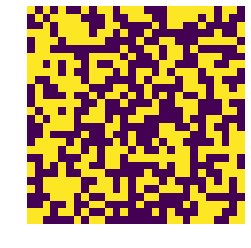

In [119]:
#l4=[l1,l2,l3]
#l4= l4/255
l1 = np.random.randint(0,2,784)
l1=l1/255
l2 = l1.reshape(-1, 28, 28, 1)
plt.imshow(l2.reshape(28,28),cmap="binary")
plt.axis("off")

In [21]:
logreg = LogisticRegression()
#30 Variables
rfe = RFE(logreg,150)
rfe = rfe.fit(X_train1, y_train1)

y_train_result = pd.DataFrame()
y_train_result['Actual'] = y_train1
y_train_result['Pred_Final'] = rfe.predict(X_train1)
print_train_score()
print ("--------------------------------")
y_test_result = pd.DataFrame()
y_test_result['Actual'] = y_test1
y_test_result['Pred_Final'] = rfe.predict(X_test1)
print_test_score()

C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


KeyboardInterrupt: 

In [ ]:
logreg = LogisticRegression()
#with 5 Variables
rfe = RFE(logreg,5)
rfe = rfe.fit(X_train1, y_train1)

y_train_result = pd.DataFrame()
y_train_result['Actual'] = y_train1
y_train_result['Pred_Final'] = rfe.predict(X_train1)
print_train_score()
print ("--------------------------------")
y_test_result = pd.DataFrame()
y_test_result['Actual'] = y_test1
y_test_result['Pred_Final'] = rfe.predict(X_test1)
print_test_score()

cols =X_train1.columns [rfe.support_] 

### Model with Logistic Regression

In [ ]:
logreg = LogisticRegression()
lr=logreg.fit(X_train1, y_train1)

y_train_result = pd.DataFrame()
y_train_result['Actual'] = y_train1
y_train_result['Pred_Final'] = lr.predict(X_train1)
print_train_score()
print ("--------------------------------")
y_test_result = pd.DataFrame()
y_test_result['Actual'] = y_test1
y_test_result['Pred_Final'] = lr.predict(X_test1)
print_test_score()

## Model with statsmodel

In [ ]:
#Just for print Summary Table
lm = sm.GLM(y_train1, sm.add_constant(X_train1), family= sm.families.Binomial()).fit()

y_train_result = pd.DataFrame()
y_train_result['Actual'] = y_train1
y_train_result['Pred_Prob'] = lm.predict( sm.add_constant(X_train1) )
y_train_result['Pred_Final']= y_train_result['Pred_Prob'].apply(lambda x: 1 if x>.5 else 0)
print_train_score()
print ("--------------------------------")
y_test_result = pd.DataFrame()
y_test_result['Actual'] = y_test1
y_test_result['Pred_Prob'] = lm.predict( sm.add_constant(X_test1) )
y_test_result['Pred_Final']= y_test_result['Pred_Prob'].apply(lambda x: 1 if x>.5 else 0)
print_test_score()

#lm.summary()

In [ ]:
#confusion Metrics of Train split of Train Data
confm = metrics.confusion_matrix(y_true= y_train1,y_pred= y_train_result['Pred_Final'])
TN = confm[0,0]
FP = confm[0,1]
FN = confm[1,0]
TP = confm[1,1]
print (confm)

In [ ]:
#confusion Metrics of Test split of Train Data
confm = metrics.confusion_matrix(y_true= y_test1,y_pred= y_test_result['Pred_Final'])
TN = confm[0,0]
FP = confm[0,1]
FN = confm[1,0]
TP = confm[1,1]
print (confm)

# Prepare for Prediction

In [ ]:
df_test = pd.read_csv("test.csv")

#Null Values Treatment of Variables
df_test['Embarked'] [ df_test['Embarked'].isna() ] = "S"
df_test['Age'] [df_test['Age'].isna()] =29

#Create Categorical Variables
df_test['Age_group']= pd.cut(df_test.Age, [0,5,10,20,30,40,50,60,80])
df_test['Fare_group']= pd.cut(df_test.Fare, [-1, 0, 5, 10, 15, 30, 50, 600])

#Decide what Variables to keep in train dataset
cols1= ['PassengerId', 'Pclass', 'Sex', 'SibSp','Parch','Embarked','Age_group','Fare_group']
df_test = df_test[cols1]

#Encoding of All Categorical Variables
df_test['Sex']= df_test['Sex'].apply(lambda x: 1 if x=="male" else 0)
Pclass1 = pd.get_dummies(df_test.Pclass, drop_first=True, prefix="PC_")
SibSp1 = pd.get_dummies(df_test.SibSp, drop_first=True, prefix="SS_")
Parch1 = pd.get_dummies(df_test.Parch, drop_first=True, prefix="P_")
Embarked1= pd.get_dummies(df_test.Embarked, drop_first=True, prefix="E_")
Age_group1= pd.get_dummies(df_test.Age_group, drop_first=True, prefix="Age_")
Fare_group1 = pd.get_dummies(df_test.Fare_group, drop_first=True, prefix="Fare_")

#Merge All Dummy Fiels in One Final Train Data
df_test = pd.concat([df_test,Pclass1,SibSp1,Parch1,Embarked1,Age_group1,Fare_group1], axis=1)
df_test.drop(['Pclass','SibSp','Parch','Embarked','Age_group','Fare_group'], inplace=True, axis=1)

X_test = df_test

# Predict on the Given Test Data

In [ ]:
# Score using on Kaggle is 0.77511

Titatic_Result = pd.DataFrame()
Titatic_Result['PassengerId'] =df_test['PassengerId']
Titatic_Result['Survived'] = lm.predict( sm.add_constant(X_test1) )

Titatic_Result.to_csv("gender_submission.csv")

# Approach 2 of Modelling- Use Advance Modelling Packages

In [ ]:
#load data in dataframe
df_train = pd.read_csv("train.csv")

#Test file for validation (final testing, result need to submitted to Kaggle with this. We do not know acutual results)
df_ftest = pd.read_csv("test.csv")

#Prepare Data
df_train["Sex"] = df_train["Sex"].fillna("NA")
df_train["Embarked"] = df_train["Embarked"].fillna("C")

df_ftest["Sex"] = df_ftest["Sex"].fillna("NA")
df_ftest["Embarked"] = df_ftest["Embarked"].fillna("C")

df_train[['Pclass', 'Age', 'SibSp', 'Fare']] = df_train[['Pclass', 'Age', 'SibSp', 'Fare']].fillna(0)
df_ftest[['Pclass', 'Age', 'SibSp', 'Fare']] = df_ftest[['Pclass', 'Age', 'SibSp', 'Fare']].fillna(0)

genders = {'male': 0, 'female': 1, 'NA': 2}
embarks = {'C': 0, 'Q': 1, 'S': 2,}

df_train['Sex'] = df_train['Sex'].apply(lambda x: genders[x])
df_train['Embarked'] = df_train['Embarked'].apply(lambda x: embarks[x])

df_ftest['Sex'] = df_ftest['Sex'].apply(lambda x: genders[x])
df_ftest['Embarked'] = df_ftest['Embarked'].apply(lambda x: embarks[x])

cols=['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked', 'Fare']

X_train = df_train[cols]
y_train = df_train['Survived']


#Scale Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train[cols] = sc.fit_transform(X_train)

#Train - Test Split
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.2, random_state=40)

X_train1.head()

In [ ]:
from sklearn import metrics

# XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
xgbModel = XGBClassifier()
xgbModel.fit(X_train1, y_train1)

y_train_result = pd.DataFrame()
y_train_result['Actual'] = y_train1
y_train_result['Pred_Prob'] = xgbModel.predict( X_train1 )
y_train_result['Pred_Final']= y_train_result['Pred_Prob'].apply(lambda x: 1 if x>.5 else 0)
print_train_score()
print ("--------------------------------")
y_test_result = pd.DataFrame()
y_test_result['Actual'] = y_test1
y_test_result['Pred_Prob'] = xgbModel.predict( X_test1 )
y_test_result['Pred_Final']= y_test_result['Pred_Prob'].apply(lambda x: 1 if x>.5 else 0)
print_test_score()


# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfModel = RandomForestClassifier()
rfModel.fit(X_train1, y_train1)
predict_f = rfModel.predict(X_test1)
metrics.accuracy_score(predict_f, y_test1)

y_train_result = pd.DataFrame()
y_train_result['Actual'] = y_train1
y_train_result['Pred_Prob'] = rfModel.predict( X_train1 )
y_train_result['Pred_Final']= y_train_result['Pred_Prob'].apply(lambda x: 1 if x>.5 else 0)
print_train_score()
print ("--------------------------------")
y_test_result = pd.DataFrame()
y_test_result['Actual'] = y_test1
y_test_result['Pred_Prob'] = rfModel.predict( X_test1 )
y_test_result['Pred_Final']= y_test_result['Pred_Prob'].apply(lambda x: 1 if x>.5 else 0)
print_test_score()

# Support Vector Machine - SVM

In [ ]:
#Using SVC
from sklearn.svm import SVC
svmModel = SVC(gamma='scale', decision_function_shape='ovo')
svmModel.fit(X_train1, y_train1)


y_train_result = pd.DataFrame()
y_train_result['Actual'] = y_train1
y_train_result['Pred_Prob'] = svmModel.predict( X_train1 )
y_train_result['Pred_Final']= y_train_result['Pred_Prob'].apply(lambda x: 1 if x>.5 else 0)
print_train_score()
print ("--------------------------------")
y_test_result = pd.DataFrame()
y_test_result['Actual'] = y_test1
y_test_result['Pred_Prob'] = svmModel.predict( X_test1 )
y_test_result['Pred_Final']= y_test_result['Pred_Prob'].apply(lambda x: 1 if x>.5 else 0)
print_test_score()

# Neural Network

In [ ]:
#Using Neural Networks
from sklearn.neural_network import MLPClassifier
nnModel = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
nnModel.fit(X_train1, y_train1)


y_train_result = pd.DataFrame()
y_train_result['Actual'] = y_train1
y_train_result['Pred_Prob'] = nnModel.predict( X_train1 )
y_train_result['Pred_Final']= y_train_result['Pred_Prob'].apply(lambda x: 1 if x>.5 else 0)
print_train_score()
print ("--------------------------------")
y_test_result = pd.DataFrame()
y_test_result['Actual'] = y_test1
y_test_result['Pred_Prob'] = nnModel.predict( X_test1 )
y_test_result['Pred_Final']= y_test_result['Pred_Prob'].apply(lambda x: 1 if x>.5 else 0)
print_test_score()

## Prepare & Scale Final Test Data (This Test data is given by customer)

In [ ]:
#Final validation test dataset should have only those column which are in fitted model
X_ftest = df_ftest[cols]

#Scale Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_ftest[cols] = sc.fit_transform(X_ftest)

# Final Prediction Using SVM

In [ ]:
#Making Predictions on Given Test Data
# Score on Kaggle is 0.75119
final_predictions = nnModel.predict(X_ftest)

In [ ]:
#Making Predictions on Given Test Data
# Score on Kaggle is 0.74641
final_predictions = rfModel.predict(X_ftest)

In [ ]:
#Making Predictions on Given Test Data
# Score on Kaggle is 0.75119
final_predictions = xgbModel.predict(X_ftest)

In [ ]:
#Making Predictions on Given Test Data 
# Score on Kaggle is 0.77990
final_predictions = svmModel.predict(X_ftest)

In [ ]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": final_predictions
    })
submission.to_csv('submission.csv', index=False)